In [999]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display

In [1000]:
import pandas as pd
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns


In [279]:
from google.colab import files
uploaded = files.upload()

Saving weeklycrct.xlsx to weeklycrct (2).xlsx


In [1001]:
data = pd.read_excel ('weeklycrct.xlsx')


In [1002]:
data.isnull().sum(axis = 0)


From Date    0
PM2.5        0
NO           0
NO2          0
NOx          0
NH3          0
SO2          0
Ozone        0
PM2.5y1      2
NOy1         2
NO2y1        2
NOxy1        2
NH3y1        2
SO2y1        2
Ozoney1      2
PM2.5y2      2
NOy2         2
NO2y2        2
NOxy2        2
NH3y2        2
SO2y2        2
Ozoney2      2
PM2.5y3      1
NOy3         1
NO2y3        1
NOxy3        1
NH3y3        1
SO2y3        1
Ozoney3      1
dtype: int64

In [1003]:
data = data.fillna(data.median())


In [1004]:
data.isnull().sum(axis = 0)


From Date    0
PM2.5        0
NO           0
NO2          0
NOx          0
NH3          0
SO2          0
Ozone        0
PM2.5y1      0
NOy1         0
NO2y1        0
NOxy1        0
NH3y1        0
SO2y1        0
Ozoney1      0
PM2.5y2      0
NOy2         0
NO2y2        0
NOxy2        0
NH3y2        0
SO2y2        0
Ozoney2      0
PM2.5y3      0
NOy3         0
NO2y3        0
NOxy3        0
NH3y3        0
SO2y3        0
Ozoney3      0
dtype: int64

In [1081]:

data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [1082]:
import datetime as dt

In [1083]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [1084]:
df=data.loc['0':'207']

In [1085]:
df

,From Date,PM2.5,NO,NO2,NOx,NH3,SO2,Ozone,PM2.5y1,NOy1,NO2y1,NOxy1,NH3y1,SO2y1,Ozoney1,PM2.5y2,NOy2,NO2y2,NOxy2,NH3y2,SO2y2,Ozoney2,PM2.5y3,NOy3,NO2y3,NOxy3,NH3y3,SO2y3,Ozoney3,year,month,day
0,719163,126.075287,26.302857,137.310000,97.560000,28.141429,24.267143,21.067143,360.551429,36.711429,143.250000,109.285714,107.202857,19.381429,20.608571,358.708571,39.011429,126.518571,109.081429,150.040000,16.978571,21.161429,107.908333,17.123333,56.933333,49.220000,178.608333,4.580000,49.548333,1970,1,1
1,719163,126.114713,39.560794,141.035079,107.217460,51.425238,36.032540,28.529048,147.790000,47.448571,98.875714,64.110000,293.744286,4.371429,47.062857,209.742857,48.975714,114.227143,52.552857,296.742857,4.384286,48.848571,123.782857,10.522857,78.045714,45.765714,342.238571,4.685714,42.050000,1970,1,1
2,719163,126.154138,14.603492,66.203492,47.072540,21.401905,13.800317,27.758095,153.547143,61.775714,118.688571,102.702857,288.337143,4.512857,47.688571,190.744898,60.705714,118.531429,115.894286,292.124286,4.450000,43.297143,110.152857,19.568571,89.411429,40.158571,300.631429,4.271429,51.192857,1970,1,1
3,719163,126.193563,14.217654,57.379990,42.129093,19.521779,8.517218,28.716454,177.758571,38.910000,81.725714,66.590714,227.610000,6.011429,25.218571,178.571429,20.386429,79.582143,62.067857,172.815000,6.082857,24.534286,67.865714,18.574286,62.675714,59.228571,123.715000,3.675714,49.335714,1970,1,1
4,719163,126.232989,28.167895,78.249649,64.528246,30.172281,8.492638,30.305899,75.971429,45.511429,106.558571,40.975714,63.821429,4.961429,12.930000,165.071429,45.531429,107.361429,41.315714,65.098571,4.974286,18.835714,133.508571,39.431429,99.832857,56.834286,68.932857,4.884286,29.428571,1970,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,719163,101.091429,51.498571,58.585714,64.812857,15.740000,8.118571,29.711429,106.172857,54.095714,57.744286,55.042857,37.981429,4.904286,23.264286,142.857143,80.625714,45.074286,74.138571,49.790000,3.578571,16.118571,149.784286,121.402857,75.078571,138.612857,203.751429,11.587746,17.128777,1970,1,1
204,719163,63.288571,53.741429,50.064286,75.085714,12.037143,2.608571,19.504286,173.848571,143.770000,63.578571,151.897143,52.612857,5.732857,18.121429,144.028571,45.332857,45.222857,75.832857,37.271429,5.592857,26.178571,147.950000,81.650000,60.125714,98.311429,152.627143,11.661439,16.815036,1970,1,1
205,719163,143.041429,60.198571,56.500000,91.804286,19.447143,6.052857,22.581429,154.002857,123.677143,66.648571,122.448571,61.412857,5.291429,16.441429,152.064286,134.887143,36.749524,144.431513,58.198571,4.803483,17.601753,74.350000,164.774286,69.271429,170.718571,248.184286,11.735132,16.501295,1970,1,1
206,719163,139.978571,70.320000,74.011429,98.191429,10.748571,5.511429,17.747143,155.460000,51.312857,44.624286,43.031429,36.337143,5.230000,9.402857,95.821429,61.235714,25.596190,83.172353,43.650000,3.976781,20.910985,279.941429,132.675714,66.684286,143.141429,215.230000,11.808825,16.187554,1970,1,1


In [1086]:
df.columns

Index(['From Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'Ozone',
       'PM2.5y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'Ozoney1',
       'PM2.5y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2', 'Ozoney2',
       'PM2.5y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'Ozoney3',
       'year', 'month', 'day'],
      dtype='object')

In [1138]:
X1 = df[['From Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'Ozone',
       'PM2.5y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'Ozoney1',
       'PM2.5y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2', 'Ozoney2',
       'PM2.5y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'Ozoney3',
       'year', 'month', 'day']]
Y1 = df['Ozone']

In [1139]:
X1

,From Date,PM2.5,NO,NO2,NOx,NH3,SO2,Ozone,PM2.5y1,NOy1,NO2y1,NOxy1,NH3y1,SO2y1,Ozoney1,PM2.5y2,NOy2,NO2y2,NOxy2,NH3y2,SO2y2,Ozoney2,PM2.5y3,NOy3,NO2y3,NOxy3,NH3y3,SO2y3,Ozoney3,year,month,day
0,719163,126.075287,26.302857,137.310000,97.560000,28.141429,24.267143,21.067143,360.551429,36.711429,143.250000,109.285714,107.202857,19.381429,20.608571,358.708571,39.011429,126.518571,109.081429,150.040000,16.978571,21.161429,107.908333,17.123333,56.933333,49.220000,178.608333,4.580000,49.548333,1970,1,1
1,719163,126.114713,39.560794,141.035079,107.217460,51.425238,36.032540,28.529048,147.790000,47.448571,98.875714,64.110000,293.744286,4.371429,47.062857,209.742857,48.975714,114.227143,52.552857,296.742857,4.384286,48.848571,123.782857,10.522857,78.045714,45.765714,342.238571,4.685714,42.050000,1970,1,1
2,719163,126.154138,14.603492,66.203492,47.072540,21.401905,13.800317,27.758095,153.547143,61.775714,118.688571,102.702857,288.337143,4.512857,47.688571,190.744898,60.705714,118.531429,115.894286,292.124286,4.450000,43.297143,110.152857,19.568571,89.411429,40.158571,300.631429,4.271429,51.192857,1970,1,1
3,719163,126.193563,14.217654,57.379990,42.129093,19.521779,8.517218,28.716454,177.758571,38.910000,81.725714,66.590714,227.610000,6.011429,25.218571,178.571429,20.386429,79.582143,62.067857,172.815000,6.082857,24.534286,67.865714,18.574286,62.675714,59.228571,123.715000,3.675714,49.335714,1970,1,1
4,719163,126.232989,28.167895,78.249649,64.528246,30.172281,8.492638,30.305899,75.971429,45.511429,106.558571,40.975714,63.821429,4.961429,12.930000,165.071429,45.531429,107.361429,41.315714,65.098571,4.974286,18.835714,133.508571,39.431429,99.832857,56.834286,68.932857,4.884286,29.428571,1970,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,719163,101.091429,51.498571,58.585714,64.812857,15.740000,8.118571,29.711429,106.172857,54.095714,57.744286,55.042857,37.981429,4.904286,23.264286,142.857143,80.625714,45.074286,74.138571,49.790000,3.578571,16.118571,149.784286,121.402857,75.078571,138.612857,203.751429,11.587746,17.128777,1970,1,1
204,719163,63.288571,53.741429,50.064286,75.085714,12.037143,2.608571,19.504286,173.848571,143.770000,63.578571,151.897143,52.612857,5.732857,18.121429,144.028571,45.332857,45.222857,75.832857,37.271429,5.592857,26.178571,147.950000,81.650000,60.125714,98.311429,152.627143,11.661439,16.815036,1970,1,1
205,719163,143.041429,60.198571,56.500000,91.804286,19.447143,6.052857,22.581429,154.002857,123.677143,66.648571,122.448571,61.412857,5.291429,16.441429,152.064286,134.887143,36.749524,144.431513,58.198571,4.803483,17.601753,74.350000,164.774286,69.271429,170.718571,248.184286,11.735132,16.501295,1970,1,1
206,719163,139.978571,70.320000,74.011429,98.191429,10.748571,5.511429,17.747143,155.460000,51.312857,44.624286,43.031429,36.337143,5.230000,9.402857,95.821429,61.235714,25.596190,83.172353,43.650000,3.976781,20.910985,279.941429,132.675714,66.684286,143.141429,215.230000,11.808825,16.187554,1970,1,1


In [1140]:
Y1

0      21.067143
1      28.529048
2      27.758095
3      28.716454
4      30.305899
         ...    
203    29.711429
204    19.504286
205    22.581429
206    17.747143
207    12.827143
Name: Ozone, Length: 208, dtype: float64

In [38]:
from google.colab import files
files.download('weeklycrct.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1141]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state= 36)


In [1142]:
forest =  RandomForestRegressor(n_estimators=1500,
                              max_depth=7,
                              max_features='auto',
                              min_samples_split=7,
                              min_samples_leaf=7,random_state=20)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=7, min_samples_leaf=7, min_samples_split=7,
                      n_estimators=1500, random_state=20)

In [1143]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.9724305009836505

Score on test data: 0.9714611717289596

Root Mean Squared Error: 1.464850062334365

Overall model accuracy: 0.9714611717289596


In [1144]:
#test=data.loc['207':'219']
#test=data.loc['220':'222']
#test=data.loc['223':'227']
#test=data.loc['228':'229']
test=data.loc['230':'256']
X=test[['From Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'Ozone',
       'PM2.5y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'Ozoney1',
       'PM2.5y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2', 'Ozoney2',
       'PM2.5y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'Ozoney3',
       'year', 'month', 'day']]

In [1145]:
predict=forest.predict(X)

In [1146]:
predict

array([35.00188902, 28.61703256, 28.45199519, 24.81526128, 14.90225565,
       35.57377693, 24.17947721, 19.12585088, 35.56264175, 33.35898723,
       25.92581404, 11.03358942, 35.56570345, 34.82920878, 16.8146695 ,
        7.35837177,  7.76904122,  7.35837177, 16.05347852, 20.19803963,
       20.63766117, 21.50929561, 20.62511546, 17.00109501, 11.18336748,
       15.35198967, 15.70778875])

In [1147]:
#dates=data.loc['212':'219','From Date']
#dates=data.loc['220':'222','From Date']
#dates=data.loc['223':'227','From Date']
#dates=data.loc['228':'229','From Date']
dates=data.loc['230':'256','From Date']

In [1148]:
X['From Date']= dates.values

In [1149]:
X.columns

Index(['From Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'Ozone',
       'PM2.5y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'SO2y1', 'Ozoney1',
       'PM2.5y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2', 'Ozoney2',
       'PM2.5y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'Ozoney3',
       'year', 'month', 'day'],
      dtype='object')

In [1150]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [1151]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [1152]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [1153]:
X['pred']=predict

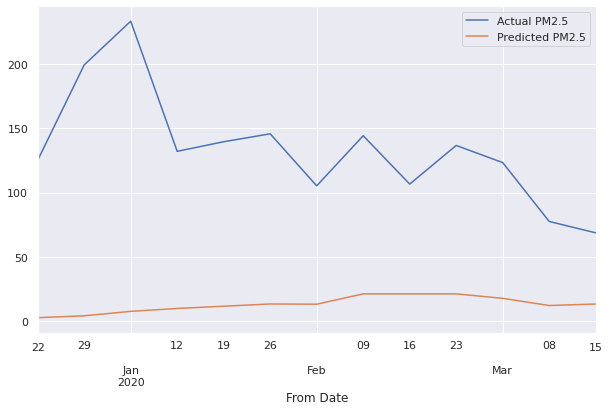

In [885]:
test['PM2.5'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted PM2.5')

In [671]:
np.sqrt(mean_squared_error(test['PM2.5'],X['pred']))

73.52148689247608

In [954]:
mae = metrics.mean_absolute_error(ytest, forest_pred)
mse = metrics.mean_squared_error(ytest, forest_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,forest_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.2452083281419379
MSE: 0.4063998529699713
RMSE: 0.6374949827018024
R-Squared: 0.9760997062252393


In [955]:
mae = metrics.mean_absolute_error(test['PM2.5'],X['pred'])
mse = metrics.mean_squared_error(test['PM2.5'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['PM2.5'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 71.47766851753809
MSE: 5109.979468677631
RMSE: 71.48412039521527
R-Squared: -836.5779751639375


# 3rd plot

In [1154]:
testcase = pd.DataFrame()

In [1155]:
testcase['test']=ytest
testcase['pred']=forest_pred

In [1156]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [1157]:
testcase

,test,pred,Corrected
167,13.444286,13.404674,14.042169
56,13.991367,14.054651,13.417156
188,21.072857,21.408393,20.770898
48,16.501295,16.536197,15.898702
92,31.522857,34.625106,33.987611
2,27.758095,28.321448,27.683953
14,27.168489,27.138033,27.775528
126,21.508658,21.697706,21.060211
104,17.733939,17.660523,18.298018
28,22.776115,22.496858,23.134353


In [1158]:
"""testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')"""

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [1159]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.9741197233923805

In [1160]:
test2020=pd.DataFrame()

In [1161]:
test2020['test']=test['Ozone']
test2020['pred']=X['pred']

In [1162]:
test2020.index=test.index

In [1163]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

In [1164]:
test2020

,test,pred,Corrected
From Date,,,
1970-01-01,32.044286,35.001889,34.364394
1970-01-01,28.142857,28.617033,27.979538
1970-01-01,27.775714,28.451995,27.814500
1970-01-01,24.724286,24.815261,24.177766
1970-01-01,14.800000,14.902256,14.264761
1970-01-01,33.180000,35.573777,34.936282
1970-01-01,24.005714,24.179477,23.541982
1970-01-01,19.012857,19.125851,18.488356
1970-01-01,33.180000,35.562642,34.925147


In [1165]:
test2020["Corrected"].describe()

count    27.000000
mean     21.388864
std       9.056930
min       7.995867
25%      14.892394
50%      20.000166
75%      27.897019
max      36.203198
Name: Corrected, dtype: float64

In [275]:
test2020["Corrected"].min()

17.791416020923368

In [276]:
test2020["Corrected"].max()

268.68336964492545

In [115]:
test2020["Corrected"].mean()

136.54028529672857

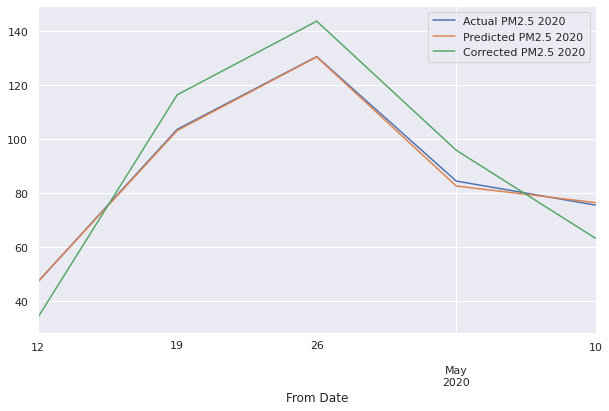

In [216]:
test2020['test'].plot(legend=True, label='Actual PM2.5 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted PM2.5 2020')
test2020["Corrected"].plot(legend=True, label='Corrected PM2.5 2020')

In [109]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.9209768140970864

In [111]:
test2020[corrected].median() 

NameError: ignored